In [1]:
from neo4j import GraphDatabase, RoutingControl
import networkx as nx
import matplotlib.pyplot as plt
# URI examples: "neo4j://localhost", "neo4j+s://xxx.databases.neo4j.io"
URI = "neo4j+s://9fa734b7.databases.neo4j.io"
AUTH = ("neo4j", "WvESt55CpzqEwqUNpE-p4NXBUwR7vcZxLjfKIGR0vHM")

with GraphDatabase.driver(URI, auth=AUTH) as driver:
    driver.verify_connectivity()

Guinevere
Lancelot
Merlin


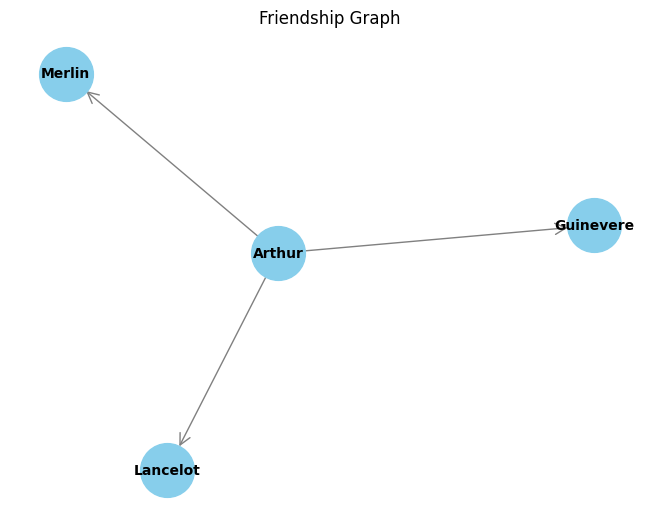

In [2]:
def add_friend(driver, name, friend_name):
    driver.execute_query(
        "MERGE (a:Person {name: $name}) "
        "MERGE (friend:Person {name: $friend_name}) "
        "MERGE (a)-[:KNOWS]->(friend)",
        name=name, friend_name=friend_name, database_="neo4j",
    )


def print_friends(driver, name):
    records, _, _ = driver.execute_query(
        "MATCH (a:Person)-[:KNOWS]->(friend) WHERE a.name = $name "
        "RETURN friend.name ORDER BY friend.name",
        name=name, database_="neo4j", routing_=RoutingControl.READ,
    )
    for record in records:
        print(record["friend.name"])


def fetch_graph_data(driver):
    """Fetches all nodes and relationships from Neo4j."""
    nodes = driver.execute_query("MATCH (n:Person) RETURN n.name as name")[0]
    relationships = driver.execute_query("MATCH (a:Person)-[r:KNOWS]->(b:Person) RETURN a.name as source, b.name as target")[0]
    return nodes, relationships


def draw_graph(nodes, relationships):
    """Draws the graph using NetworkX and Matplotlib."""
    G = nx.DiGraph()  # Directed Graph

    for node in nodes:
        G.add_node(node['name'])
    
    for relationship in relationships:
      G.add_edge(relationship["source"], relationship["target"])
    
    pos = nx.spring_layout(G, seed=42)  # Layout algorithm
    nx.draw(
        G,
        pos,
        with_labels=True,
        node_color="skyblue",
        node_size=1500,
        font_size=10,
        font_weight="bold",
        arrowsize=20,
        edge_color="gray",
        arrowstyle="->",
    )
    plt.title("Friendship Graph")
    plt.show()


with GraphDatabase.driver(URI, auth=AUTH) as driver:
    add_friend(driver, "Arthur", "Guinevere")
    add_friend(driver, "Arthur", "Lancelot")
    add_friend(driver, "Arthur", "Merlin")
    print_friends(driver, "Arthur")

    # Fetch and draw the graph
    nodes, relationships = fetch_graph_data(driver)
    draw_graph(nodes, relationships)